# Taller II Fundamentos de Analítica II

## Alejandra Ruiz - Juan Camilo Vergara

### IMPORTS

In [3]:
import pandas as pd
import numpy as np
from statsmodels.sandbox.stats.runs import runstest_1samp 
import statsmodels.api as sm 
from matplotlib import pyplot as plt 
import pylab as py
from scipy import stats
from datetime import datetime
from dateutil.relativedelta import relativedelta

### EXTRACT

In [4]:
data = pd.read_excel("datosEmpleo.xlsx",index_col='mes',parse_dates=True)
data.head()

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911


### SPLIT

In [130]:
train_data_ocupado = data[["Ocupados"]][:len(data)-6] 
test_data_ocupado = data[["Ocupados"]][len(data)-6:len(data)]

In [9]:
print(test_data_ocupado)

             Ocupados
mes                  
2018-11-01  10783.299
2018-12-01  10835.398
2019-01-01  10314.438
2019-02-01  10557.917
2019-03-01  10760.776
2019-04-01  10632.028


OBJETIVO: Evaluar diferentes modelos para estimar la tendencia y la estacionalidad de la serie 'OCUPADOS' del DANE. 
Generación de una función que permita evaluar la tendencia usando tres órdenes: 

- Lineal
- Cuadrática 
- Polinómica

In [10]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd

def fit_polynomial_model(order, train_data, test_data, h=6):
    # Paso 1: Definir las variables independientes y dependientes
    y = train_data
    x = np.linspace(1, len(train_data), len(train_data))
    
    # Generar las características polinómicas
    X = np.vander(x, N=order+1, increasing=True)
    
    # Ajustar el modelo
    model = sm.OLS(y, X)
    model_fit = model.fit()
    print(f"Modelo Orden {order} SUMMARY:")
    print(model_fit.summary())

    # Paso 2: Graficar los residuos del modelo
    print("RESIDUALES:")
    plt.figure(figsize=(10, 6))
    plt.ylabel("Residuales del modelo")
    plt.plot(model_fit.resid)
    plt.grid()
    plt.show()
    
    # Paso 3: Graficar la tendencia ajustada vs. la serie original
    print("Original vs Tendencia")
    plt.figure(figsize=(10, 6))
    plt.plot(y, label="Ocupados")
    plt.plot(model_fit.fittedvalues, label=f"Tendencia de Orden {order}")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Paso 4: Pronóstico para h periodos
    x_for = np.linspace(len(train_data) + 1, len(train_data) + h, h)
    X_for = np.vander(x_for, N=order+1, increasing=True)
    
    # Obtener los pronósticos con intervalos de confianza
    dt = model_fit.get_prediction(X_for).summary_frame(alpha=0.05)
    y_prd = dt['mean']
    yprd_ci_lower = dt['obs_ci_lower']
    yprd_ci_upper = dt['obs_ci_upper']
    
    preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
    preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
    
    print("Pronóstico para un horizonte de 6 periodos")
    print(preds)
    
    # Paso 5: Gráfica de los datos de entrenamiento y los pronósticos
    print("Original vs Pronótico de los 6 meses siguientes")
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, label="Train Data")
    plt.plot(x_for, preds['Point_forecast'], label=f"Tendencia de Orden {order}")
    plt.fill_between(x_for, preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
    plt.legend()
    plt.show()

    # Paso 6: Cálculo del RMSE
    rmse = np.sqrt(mean_squared_error(test_data, preds['Point_forecast']))
    print(f"RMSE - Modelo de Orden {order}: {rmse}")
    
    return model_fit, preds, rmse

## Modelos

### Tendencia Lineal

Resumen del modelo de orden 1:
                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     5439.
Date:                Tue, 13 Aug 2024   Prob (F-statistic):          4.10e-153
Time:                        21:11:06   Log-Likelihood:                -1483.6
No. Observations:                 214   AIC:                             2971.
Df Residuals:                     212   BIC:                             2978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6916.5808

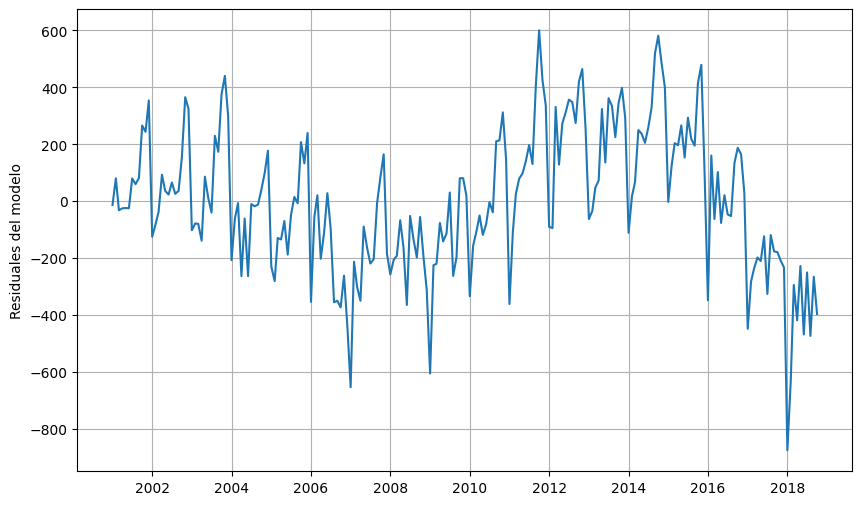

Graficamos la serie original y la tendencia


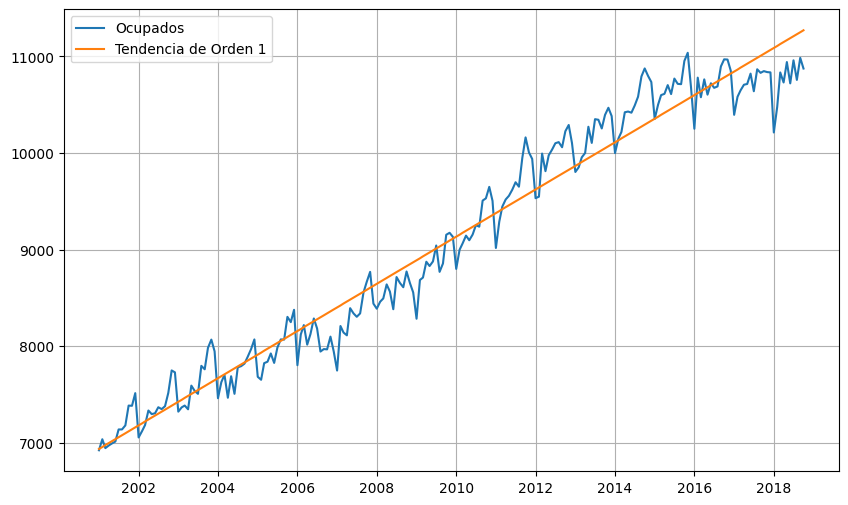

Realizamos el pronóstico para un horizonte de 6 periodos
   Point_forecast      lower_95      upper_95
0    11290.562073  10794.552484  11786.571663
1    11310.906172  10814.832205  11806.980139
2    11331.250271  10835.111339  11827.389204
3    11351.594370  10855.389885  11847.798855
4    11371.938469  10875.667843  11868.209094
5    11392.282568  10895.945215  11888.619920
Graficamos la serie original y el pronóstico estimado para los próximos 6 meses


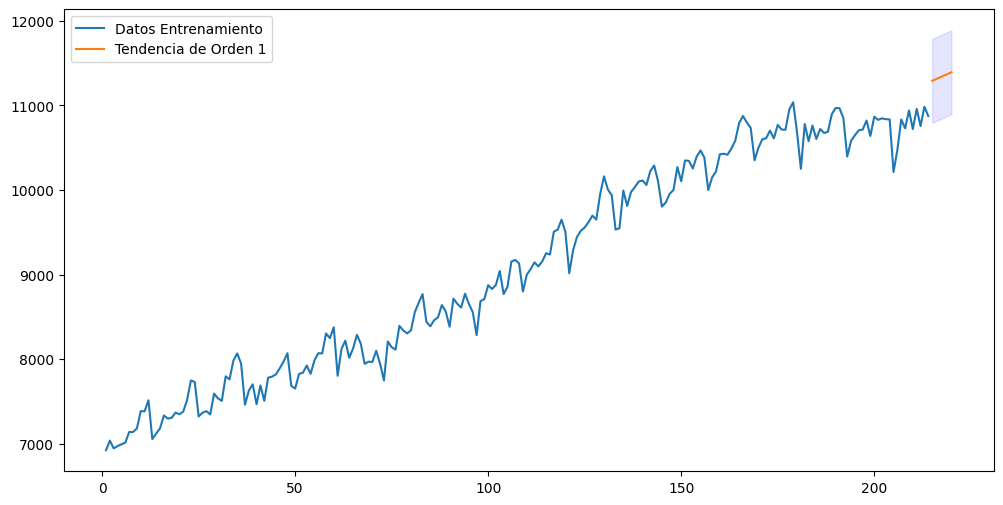

RMSE - Modelo de Orden 1: 718.6516751001753


In [11]:
model_fit_lin, preds_lin, rmse_lin = fit_polynomial_model(order=1, train_data=train_data_ocupado, test_data=test_data_ocupado)

### Tendencia Cuadrática

Resumen del modelo de orden 2:
                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     2750.
Date:                Tue, 13 Aug 2024   Prob (F-statistic):          7.46e-152
Time:                        21:11:59   Log-Likelihood:                -1482.0
No. Observations:                 214   AIC:                             2970.
Df Residuals:                     211   BIC:                             2980.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6846.9680

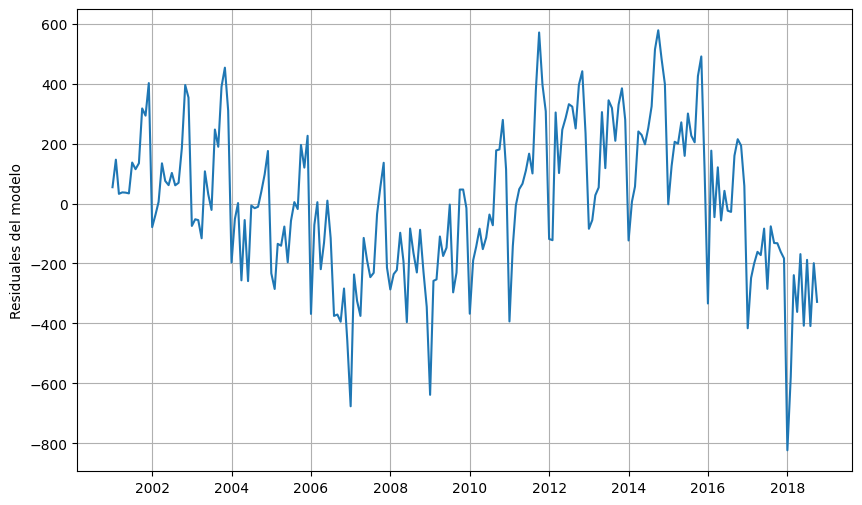

Graficamos la serie original y la tendencia


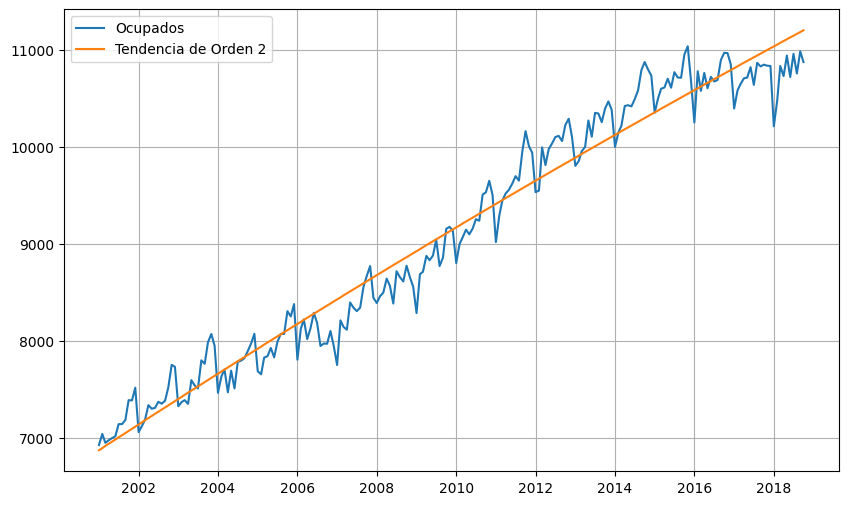

Realizamos el pronóstico para un horizonte de 6 periodos
   Point_forecast      lower_95      upper_95
0    11220.949257  10721.787967  11720.110547
1    11239.350672  10739.800787  11738.900558
2    11257.734100  10757.783260  11757.684941
3    11276.099540  10775.735164  11776.463916
4    11294.446992  10793.656279  11795.237705
5    11312.776457  10811.546382  11814.006531
Graficamos la serie original y el pronóstico estimado para los próximos 6 meses


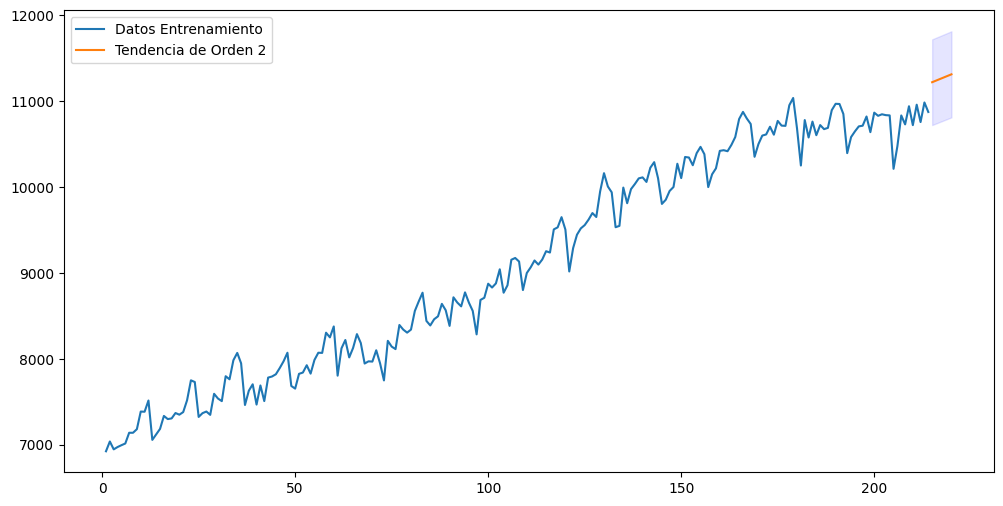

RMSE - Modelo de Orden 2: 646.5978131665922


In [12]:
model_fit_quad, preds_quad, rmse_quad = fit_polynomial_model(order=2, train_data=train_data_ocupado, test_data=test_data_ocupado)

### Tendencia Polinómica 

Resumen del modelo de orden 3:
                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     2873.
Date:                Tue, 13 Aug 2024   Prob (F-statistic):          3.73e-170
Time:                        21:12:25   Log-Likelihood:                -1434.9
No. Observations:                 214   AIC:                             2878.
Df Residuals:                     210   BIC:                             2891.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7246.7790

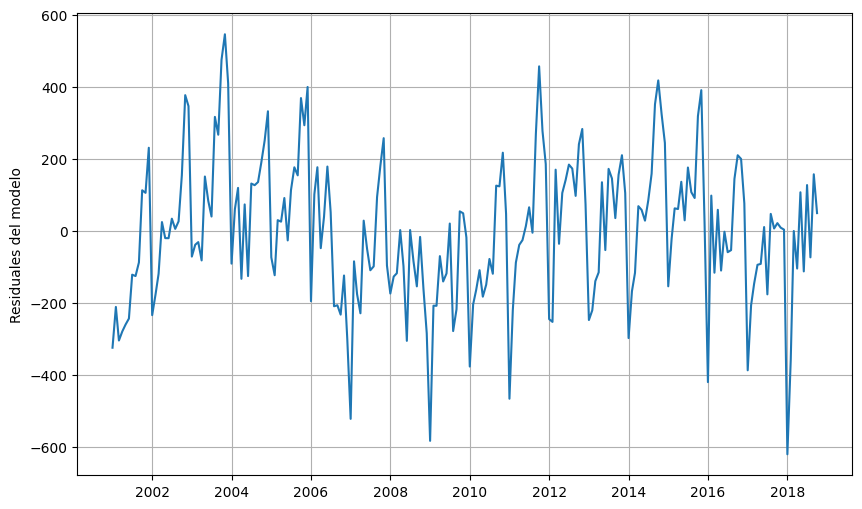

Graficamos la serie original y la tendencia


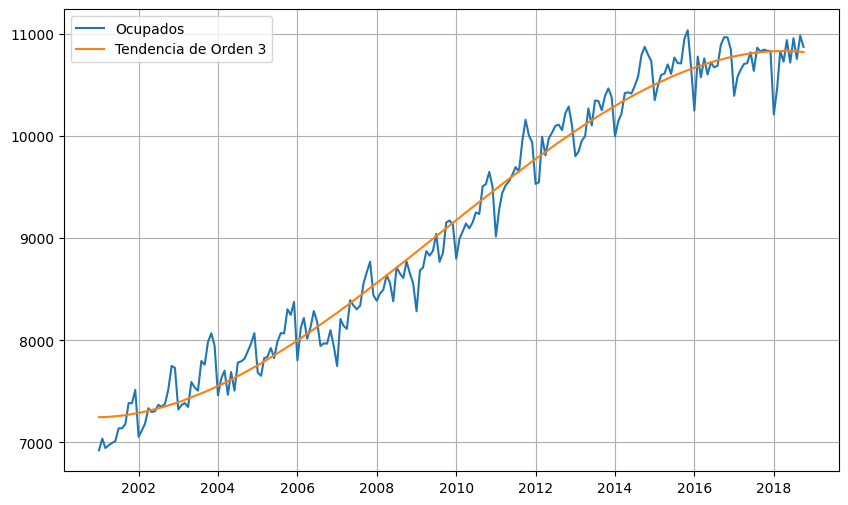

Realizamos el pronóstico para un horizonte de 6 periodos
   Point_forecast      lower_95      upper_95
0    10821.138290  10413.038112  11229.238468
1    10817.224675  10408.066442  11226.382908
2    10812.776520  10402.493637  11223.059404
3    10807.789065  10396.312228  11219.265902
4    10802.257549  10389.514708  11215.000391
5    10796.177211  10382.093533  11210.260890
Graficamos la serie original y el pronóstico estimado para los próximos 6 meses


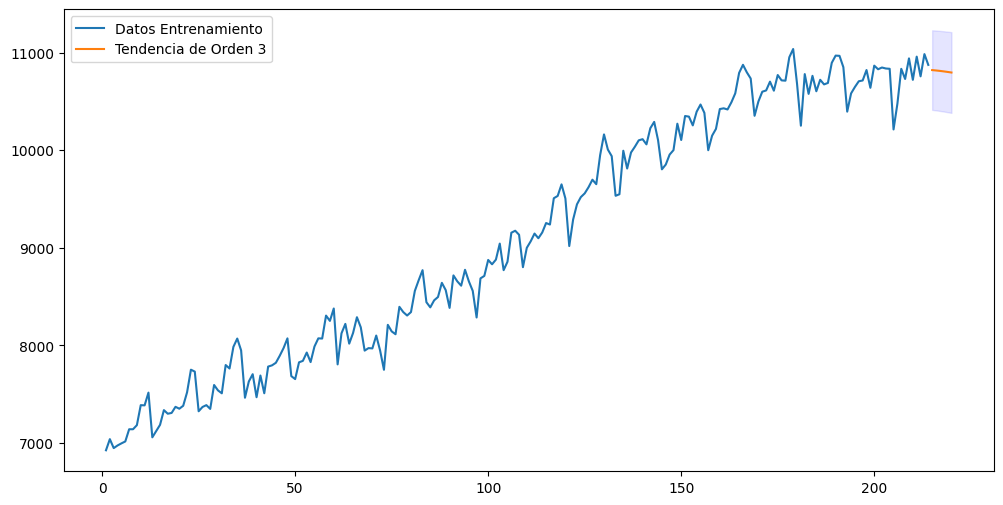

RMSE - Modelo de Orden 3: 238.46910841743411


In [13]:
model_fit_cubic, preds_cubic, rmse_cubic = fit_polynomial_model(order=3, train_data=train_data_ocupado, test_data=test_data_ocupado)

A continuación, procedemos a estimar la estacionalidad de la serie.

## Estacionalidad

In [14]:
month_dummies = pd.get_dummies(data.index.month,drop_first=True).set_index(data.index)
month_dummies = month_dummies.astype(float)

y = data["Ocupados"]
X = sm.add_constant(month_dummies)
sea = sm.OLS(y,X)
season = sea.fit()
print(season.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.2787
Date:                Tue, 13 Aug 2024   Prob (F-statistic):              0.989
Time:                        21:14:24   Log-Likelihood:                -1886.0
No. Observations:                 220   AIC:                             3796.
Df Residuals:                     208   BIC:                             3837.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8808.2176    301.805     29.185      0.0

In [40]:
print(month_dummies)

             2    3    4    5    6    7    8    9    10   11   12
mes                                                              
2001-01-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2001-02-01  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2001-03-01  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2001-04-01  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2001-05-01  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
2018-12-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
2019-01-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2019-02-01  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2019-03-01  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2019-04-01  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[220 rows x 11 columns]


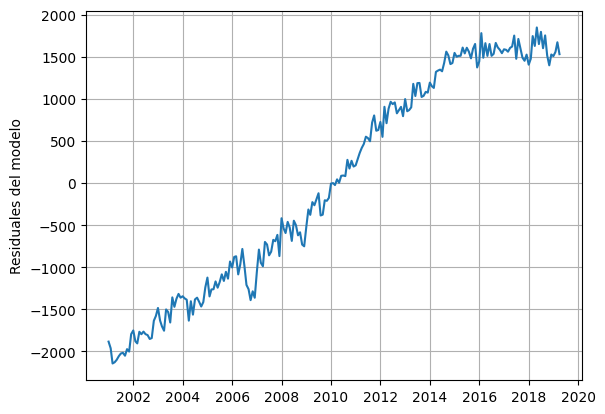

In [41]:
plt.ylabel("Residuales del modelo")
plt.plot(season.resid)
plt.grid()

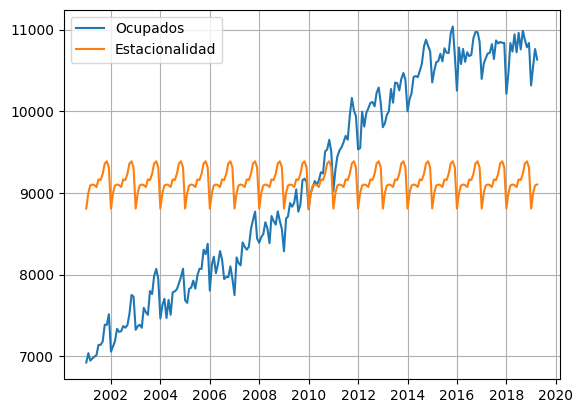

In [42]:
plt.plot(y,label="Ocupados")
plt.plot(season.fittedvalues,label="Estacionalidad")
plt.legend()
plt.grid()
plt.show()

In [18]:
range_dates = pd.date_range(data.index[-1]+ relativedelta(months=1), periods=12,freq='MS')

x_for = pd.get_dummies(range_dates.month,drop_first=True)
X_for= sm.add_constant(x_for)

In [20]:
x_for = x_for.apply(lambda x: x.astype(int))
X_for = sm.add_constant(x_for)

In [22]:
dt = season.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(range_dates,inplace=True)
print(preds)

            Point_forecast     lower_95      upper_95
2019-05-01     9095.089000  6430.527026  11759.650974
2019-06-01     9071.789000  6407.227026  11736.350974
2019-07-01     9164.935167  6500.373193  11829.497140
2019-08-01     9156.633500  6492.071526  11821.195474
2019-09-01     9232.988500  6568.426526  11897.550474
2019-10-01     9359.934944  6695.372971  12024.496918
2019-11-01     9386.702222  6722.140249  12051.264196
2019-12-01     9310.332667  6645.770693  11974.894640
2020-01-01     8808.217632  6147.348746  11469.086517
2020-02-01     9001.037684  6340.168799  11661.906569
2020-03-01     9090.037158  6429.168273  11750.906043
2020-04-01     9102.647316  6441.778431  11763.516201


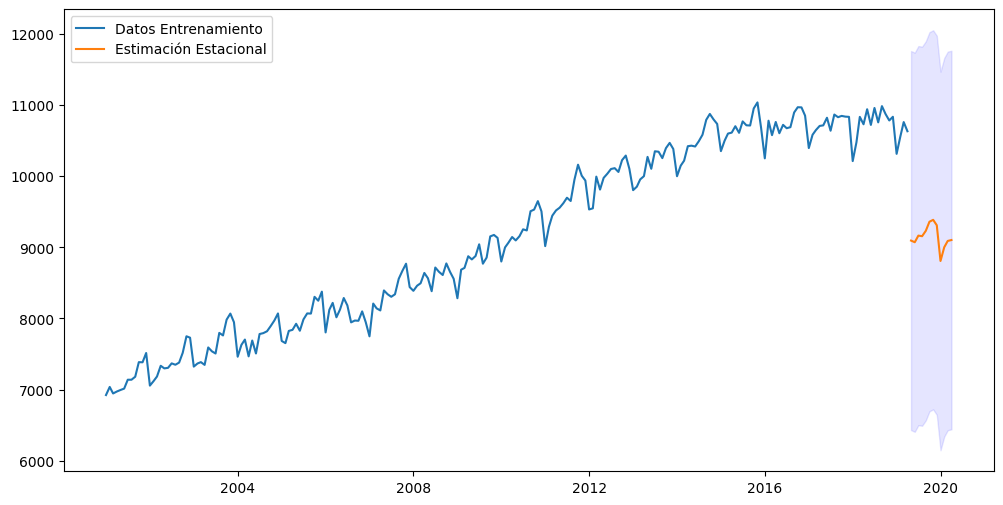

In [23]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Estimación Estacional")
plt.fill_between(preds.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

In [24]:
# Cálculo del RMSE

fitted_values = season.fittedvalues
errors = y - fitted_values
mse = np.mean(errors**2)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# Guardar el RMSE en una variable
rmse_estacionalidad = rmse

RMSE: 1279.1551318629215


# 6. Combinación de los Modelos


- Tendencia Lineal + Estacionalidad 
- Tendencia Cuadrática + Estacionalidad
- Tendencia Polinómica + Estacinoalidad

In [96]:
def train_model(order, train_data, month_dummies):
    y = train_data.copy()
    x = np.linspace(1, len(train_data), len(train_data))
    X_poly = np.vander(x, N=order+1, increasing=True)
    
    X_design = sm.add_constant(np.column_stack((X_poly, month_dummies)))
    
    model = sm.OLS(y, X_design)
    model_fit = model.fit()
    
    return model_fit

In [87]:
def plot_residuals(model_fit):
    plt.figure(figsize=(10, 5))
    plt.plot(model_fit.resid, label='Residuals')
    plt.ylabel("Residuals")
    plt.grid(True)
    plt.legend()
    plt.show()

In [93]:
def plot_results(model_fit,train_data):
    plt.figure(figsize=(10, 5))
    plt.plot(train_data, label="Actual")
    plt.plot(model_fit.fittedvalues, label="Fitted")
    plt.ylabel("Values")
    plt.title("Actual vs Fitted Values")
    plt.legend()
    plt.grid(True)
    plt.show()

In [115]:
def generate_forecast(order, train_data, model_fit, h, month_dummies):
    x_for = np.linspace(len(train_data) + 1, len(train_data) + h, h)
    X_poly_for = np.vander(x_for, N=order+1, increasing=True)
    
    
    forecast_dates = pd.date_range(train_data.index[-1] + relativedelta(months=1), periods=h, freq='MS')
    month_dummies_for = pd.get_dummies(forecast_dates.month, drop_first=True)
    month_dummies_for = month_dummies_for.astype(int)
    month_dummies_for = month_dummies_for.reindex(columns=month_dummies.columns, fill_value=0)
    
    X_for = sm.add_constant(np.column_stack((X_poly_for, month_dummies_for)))
    
    forecast_results = model_fit.get_prediction(X_for).summary_frame(alpha=0.05)
    preds = forecast_results[['mean', 'obs_ci_lower', 'obs_ci_upper']]
    preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
    preds.index = forecast_dates
    
    return preds

In [90]:
def plot_forecast(train_data, preds):
    plt.figure(figsize=(10, 5))
    plt.plot(train_data.index, train_data, label="Historical Data")
    plt.plot(preds.index, preds['Point_forecast'], label="Forecast", color='blue')
    plt.fill_between(preds.index, preds['lower_95'], preds['upper_95'], color='blue', alpha=0.2)
    plt.title("Forecast vs Actual")
    plt.legend()
    plt.grid(True)
    plt.show()

In [117]:
def fit_polynomial_model_with_seasonality(order, train_data, test_data=None, h=12):
    try:
        
        print(f"MODELO DE ORDEN #{order}")
        month_dummies = pd.get_dummies(train_data.index.month, drop_first=True).set_index(train_data.index)
        model_fit = train_model(order, train_data, month_dummies)
        print(model_fit.summary())
        
        rmse_train = np.sqrt(mean_squared_error(train_data, model_fit.fittedvalues))
        
        plot_residuals(model_fit)
        plot_results(model_fit,train_data)
        
        
        preds = generate_forecast(order, train_data, model_fit, h, month_dummies)
        plot_forecast(train_data, preds)
        
        rmse_test = None
        if test_data is not None:
            y_test = test_data
            x_test = np.linspace(len(train_data) + 1, len(train_data) + len(test_data), len(test_data))
            X_poly_test = np.vander(x_test, N=order+1, increasing=True)
            month_dummies_test = pd.get_dummies(test_data.index.month, drop_first=True).reindex(columns=month_dummies.columns, fill_value=0)
            X_test = sm.add_constant(np.column_stack((X_poly_test, month_dummies_test)))
            y_pred_test = model_fit.predict(X_test)
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
            
        
        return preds, rmse_train, rmse_test, model_fit
    
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None, None

MODELO DE ORDEN #1
                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     585.2
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          4.02e-149
Time:                        09:27:56   Log-Likelihood:                -1451.7
No. Observations:                 214   AIC:                             2929.
Df Residuals:                     201   BIC:                             2973.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6635.5874     57.739 

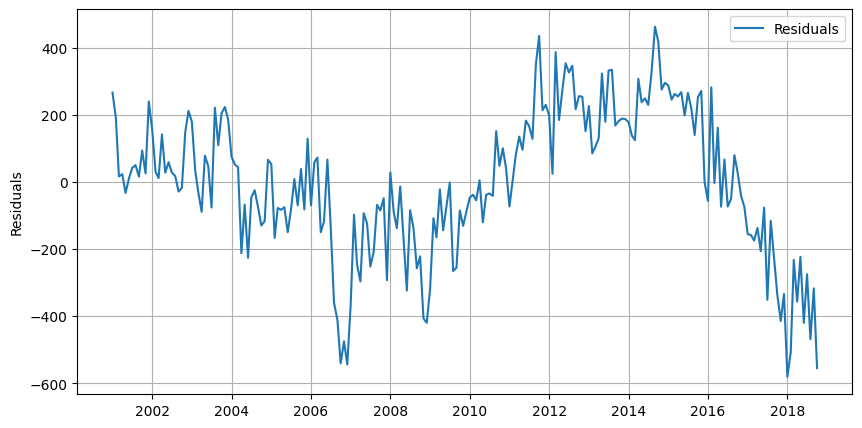

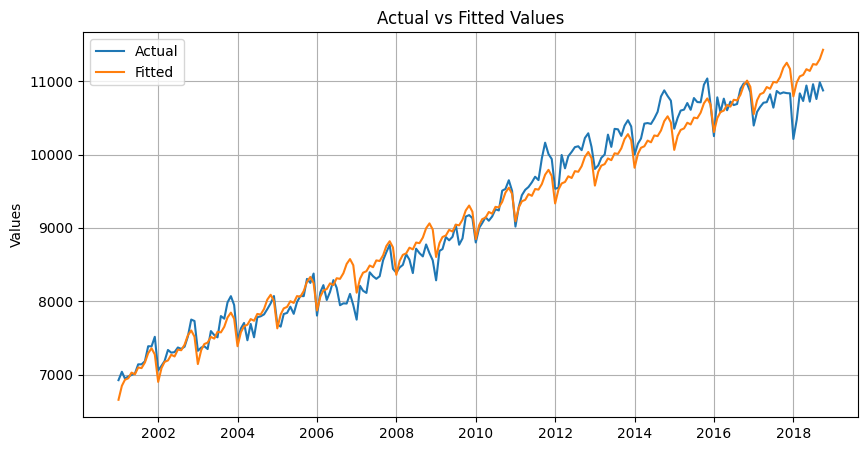

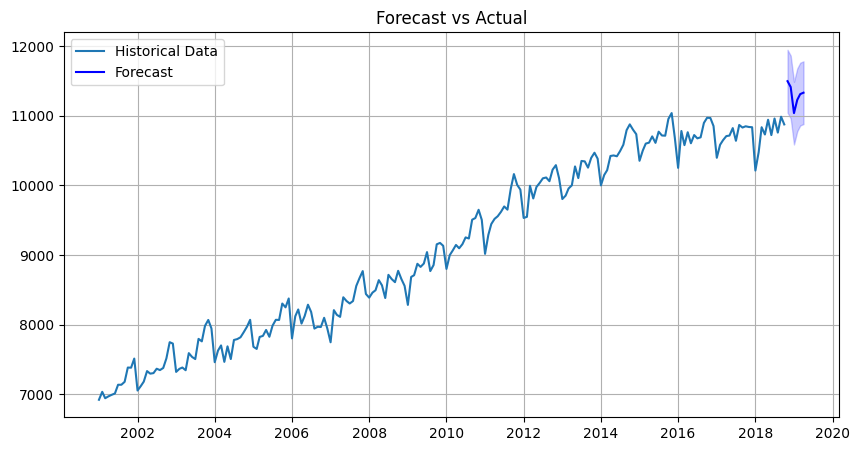

{'rmse_train_sta_order_1': 213.69591955163636, 'rmse_test_sta_order_1': 657.5089799828975}
MODELO DE ORDEN #2
                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     546.8
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          1.87e-148
Time:                        09:27:56   Log-Likelihood:                -1449.9
No. Observations:                 214   AIC:                             2928.
Df Residuals:                     200   BIC:                             2975.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

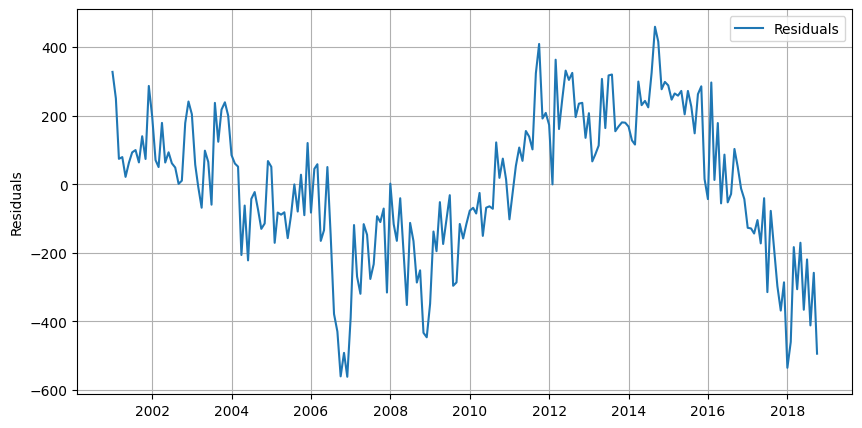

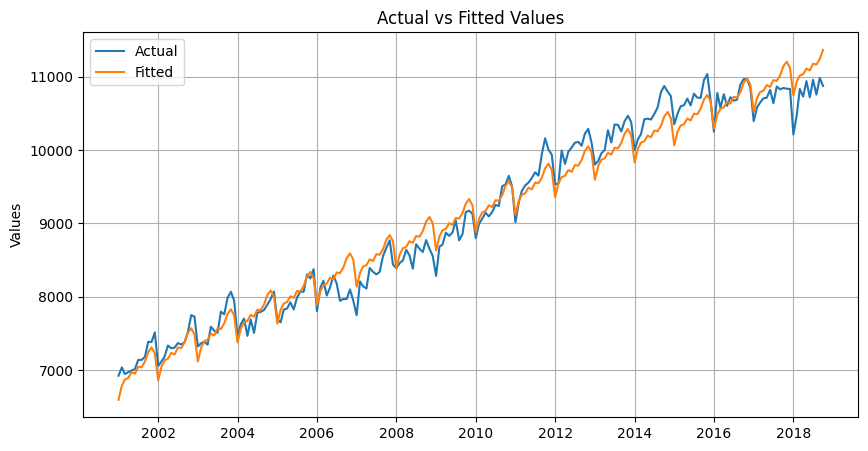

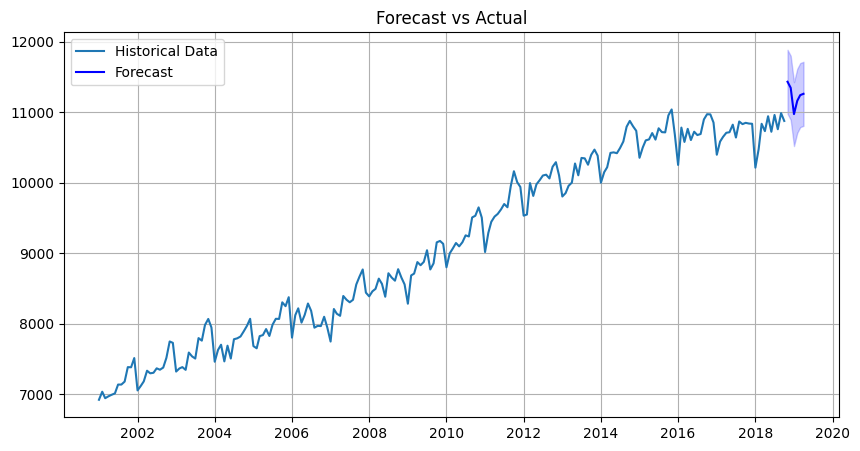

{'rmse_train_sta_order_2': 211.9149907756035, 'rmse_test_sta_order_2': 590.4794957131182}
MODELO DE ORDEN #3
                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1079.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          3.41e-179
Time:                        09:27:57   Log-Likelihood:                -1370.3
No. Observations:                 214   AIC:                             2771.
Df Residuals:                     199   BIC:                             2821.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

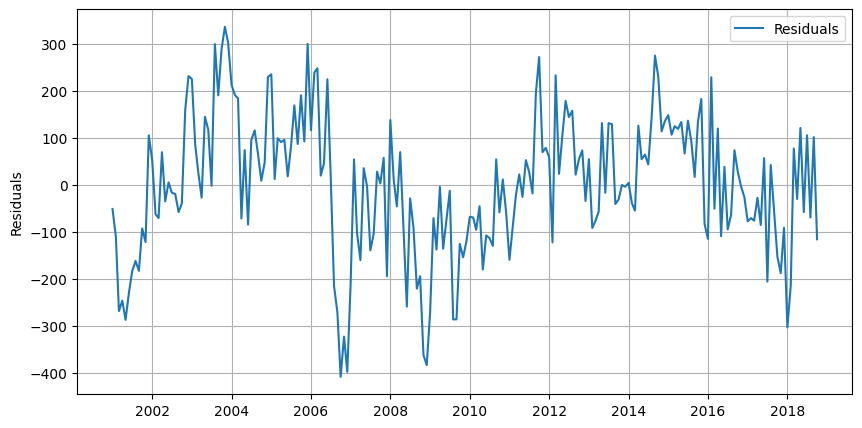

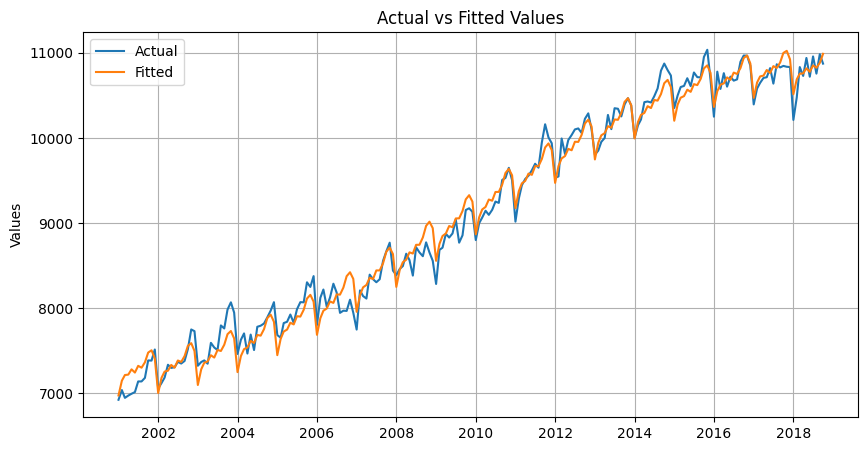

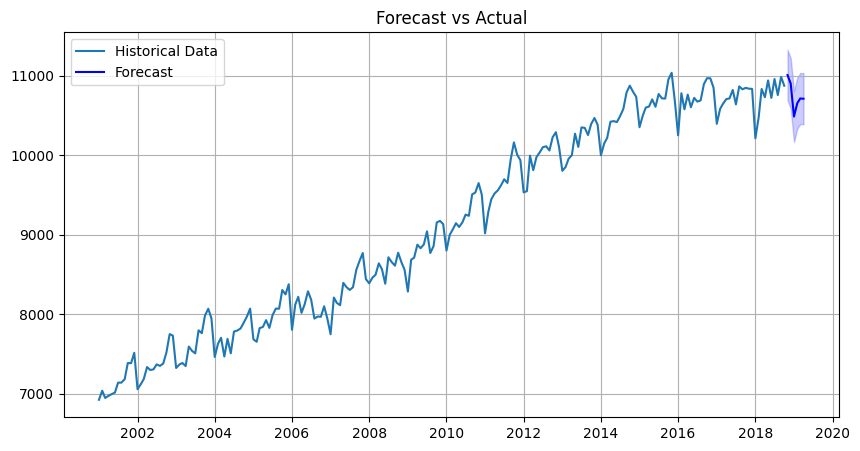

{'rmse_train_sta_order_3': 146.0769304789087, 'rmse_test_sta_order_3': 130.7439394101483}
MODELO DE ORDEN #4
                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1343.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          4.06e-190
Time:                        09:27:58   Log-Likelihood:                -1339.3
No. Observations:                 214   AIC:                             2711.
Df Residuals:                     198   BIC:                             2764.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

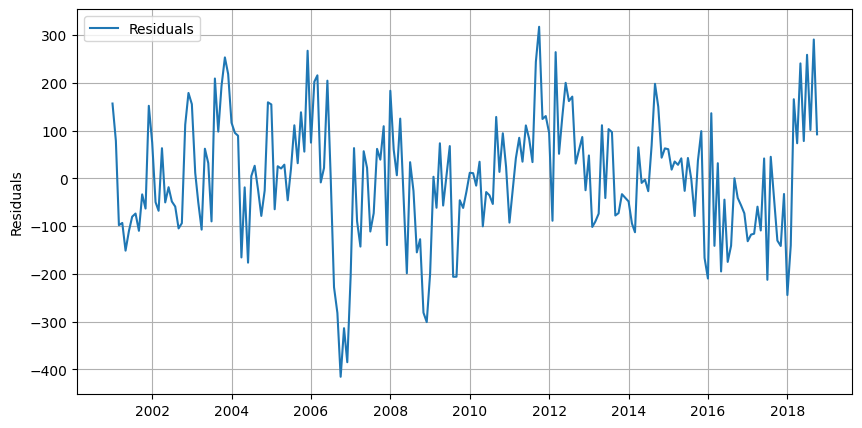

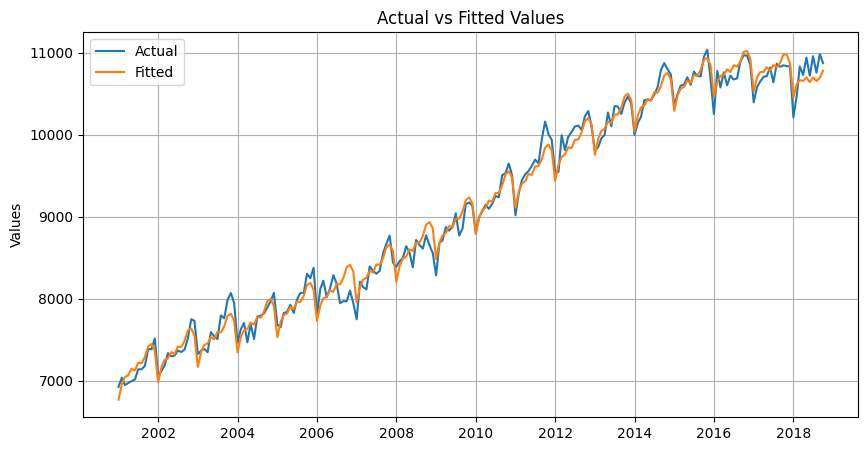

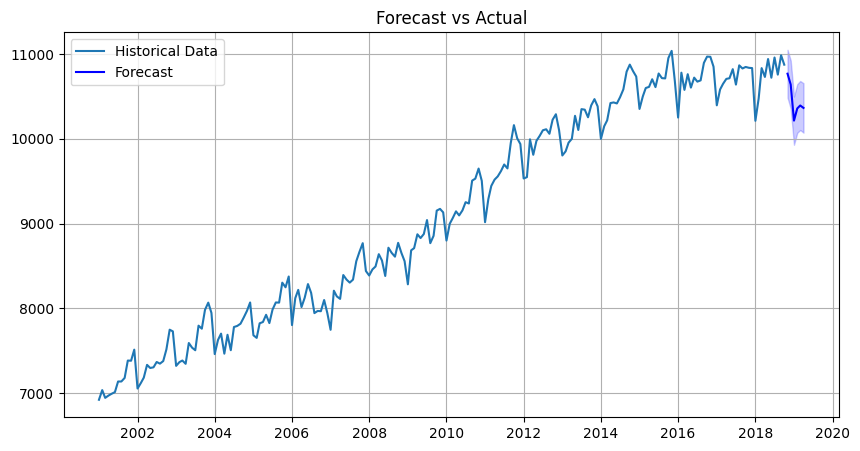

{'rmse_train_sta_order_4': 126.37549485145207, 'rmse_test_sta_order_4': 221.62184741192124}
MODELO DE ORDEN #5
                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1447.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          1.19e-194
Time:                        09:27:59   Log-Likelihood:                -1324.0
No. Observations:                 214   AIC:                             2682.
Df Residuals:                     197   BIC:                             2739.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

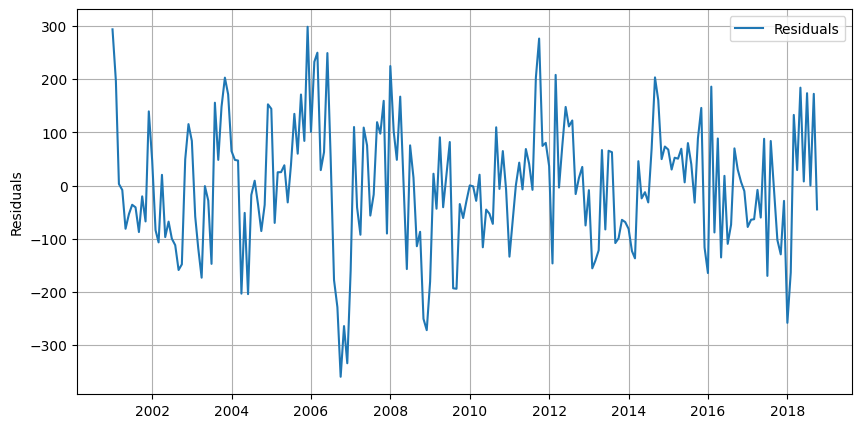

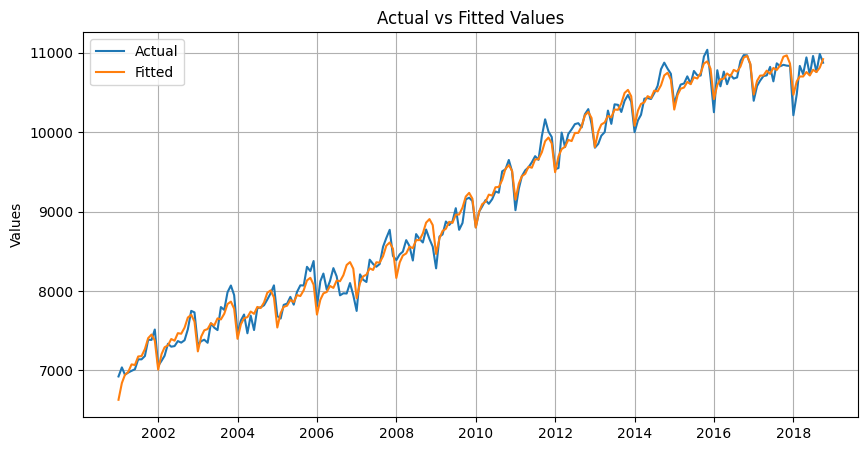

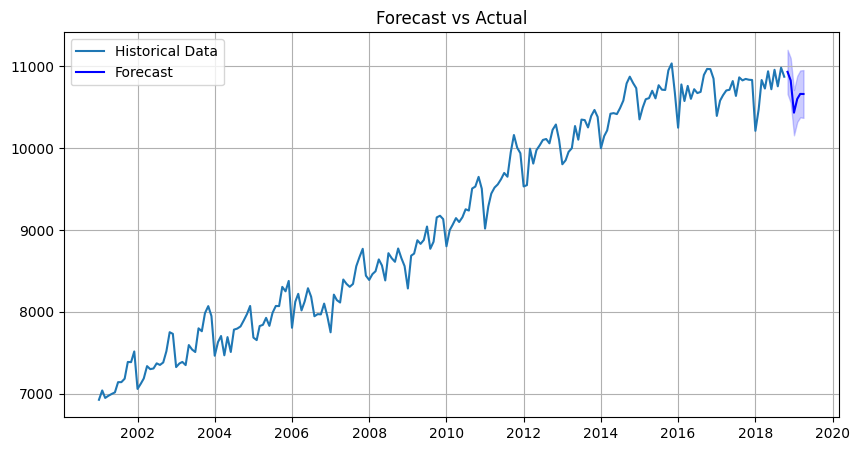

{'rmse_train_sta_order_5': 117.66734244574617, 'rmse_test_sta_order_5': 90.99094424774161}
MODELO DE ORDEN #6
                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1534.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          3.97e-197
Time:                        09:28:01   Log-Likelihood:                -1317.8
No. Observations:                 214   AIC:                             2670.
Df Residuals:                     197   BIC:                             2727.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

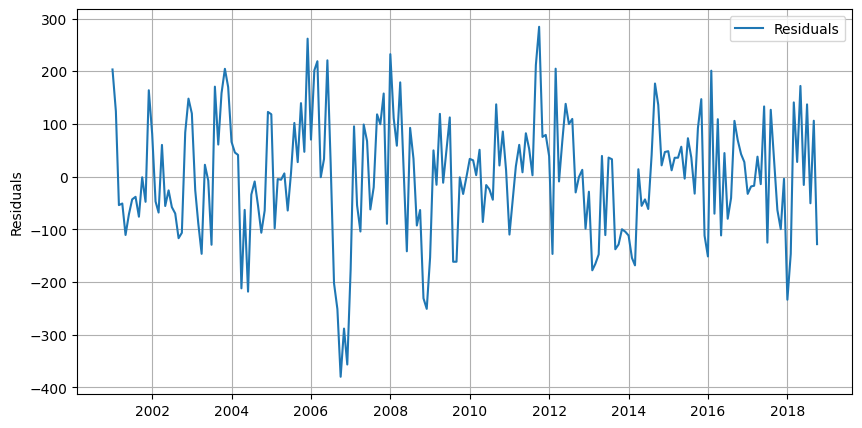

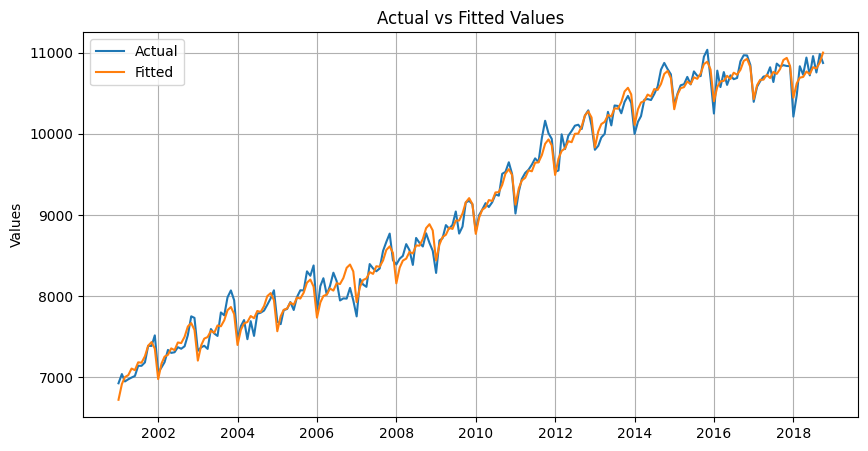

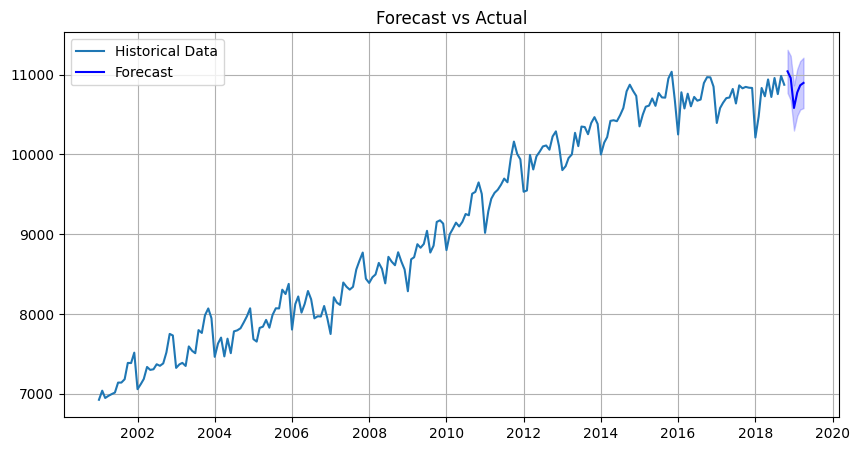

{'rmse_train_sta_order_6': 114.30737618471846, 'rmse_test_sta_order_6': 218.04543914903135}


In [118]:
results = {}

for order in range(1, 7):

    preds, rmse_train, rmse_test, _ = fit_polynomial_model_with_seasonality(
        order=order,
        train_data=train_data_ocupado,
        test_data=test_data_ocupado,
        h=6
    )
    results[f"rmse_test_sta_order_{order}"] = rmse_test
    
    print({
        f"rmse_train_sta_order_{order}": rmse_train,
        f"rmse_test_sta_order_{order}": rmse_test
    })

# 7. Pronóstico utilizando el Mejor Modelo 

Previamente debemos evalular los RMSE para seleccionar el mejor modelo para predecir. En este punto debemos usar TODOS los datos.

### El mejor modelo fue el de orden 5

MODELO DE ORDEN #5
                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1529.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          6.92e-202
Time:                        09:28:45   Log-Likelihood:                -1359.6
No. Observations:                 220   AIC:                             2753.
Df Residuals:                     203   BIC:                             2811.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6586.1105     56.849 

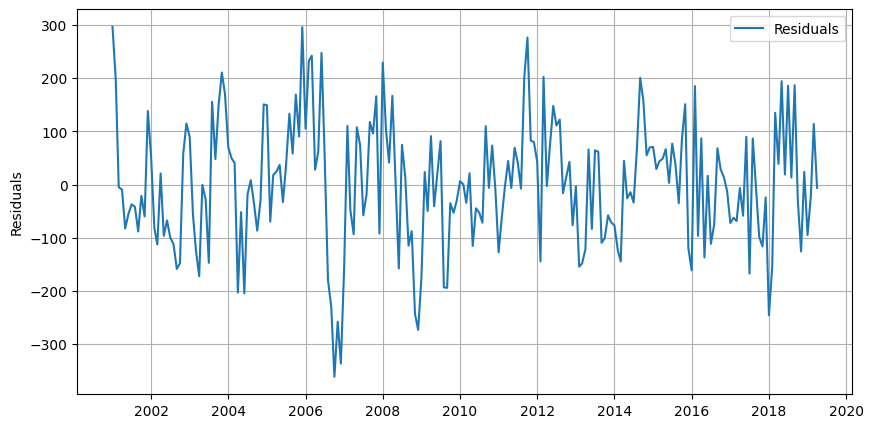

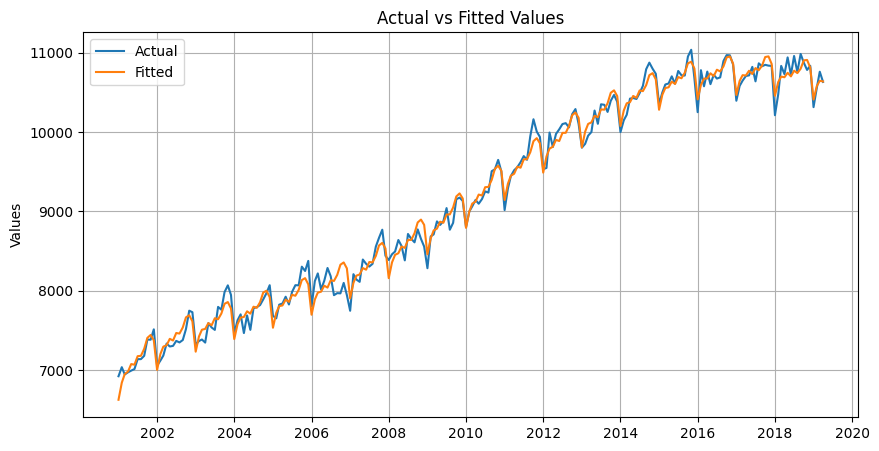

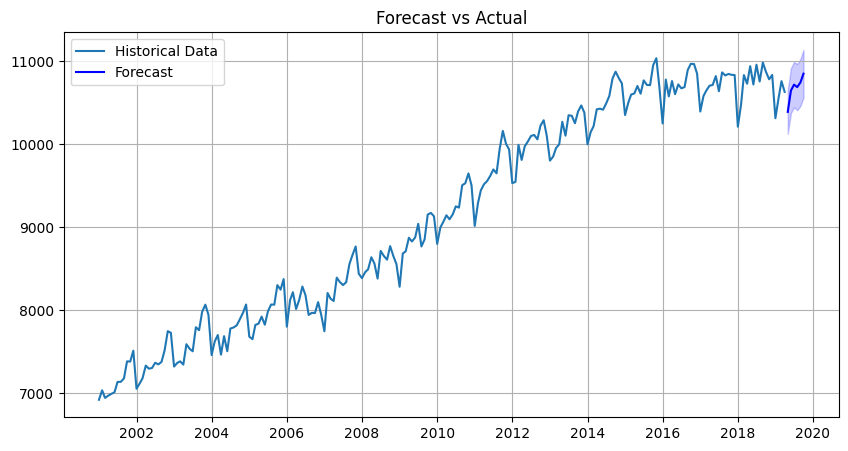

            Point_forecast      lower_95      upper_95
2019-05-01    10390.826511  10125.219578  10656.433445
2019-06-01    10647.728975  10377.669817  10917.788132
2019-07-01    10719.063199  10445.369223  10992.757175
2019-08-01    10689.347835  10411.533460  10967.162210
2019-09-01    10744.714951  10462.254438  11027.175465
2019-10-01    10851.128040  10563.455494  11138.800586


In [119]:
preds_best_model, _, _ ,model_final_fit = fit_polynomial_model_with_seasonality(
    order=5, 
    train_data=data[["Ocupados"]],
    test_data=None,
    h=6
)
print(preds_best_model)

# 8. Validación de Supuestos 

## 1. Normalidad de los residuos:
    Los residuos (diferencia entre los valores observados y los valores ajustados) deben seguir una distribución normal.
- Verificación: Shapiro-Wilk o un histograma de los residuos y una gráfica Q-Q (cuantil-cuantil).

## 2. Homocedasticidad:
    La varianza de los residuos debe ser constante en todos los niveles de la variable independiente.
- Verificación: Utiliza una gráfica de residuos vs valores ajustados. También se puede aplicar la prueba de Breusch-Pagan.
## 3. Independencia de los residuos:
    Los residuos deben ser independientes entre sí, es decir, no deben mostrar autocorrelación.
- Verificación: Prueba de Durbin-Watson para verificar la autocorrelación de los residuos.
## 4. Multicolinealidad:
    Verificar si hay multicolinealidad entre los términos polinomiales.
- Verificación: Calcular el Factor de Inflación de la Varianza (VIF) para cada predictor. Un VIF mayor a 10 podría indicar un problema de multicolinealidad.

In [127]:
from statsmodels.stats.diagnostic import het_breuschpagan, linear_rainbow
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

def validate_model_assumptions(model_fit):
    # 1. Normalidad de los residuos
    residuals = model_fit.resid
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    sm.qqplot(residuals, line='s', ax=ax)
    plt.title('Q-Q plot of residuals')
    plt.grid(True)
    plt.show()

    # Histograma de los residuos
    plt.figure(figsize=(10, 5))
    plt.hist(residuals, bins=20, edgecolor='black')
    plt.title('Histogram of residuals')
    plt.grid(True)
    plt.show()

    # Shapiro-Wilk test
    shapiro_test = stats.shapiro(residuals)
    print(f"Shapiro-Wilk Test: W={shapiro_test[0]:.4f}, p-value={shapiro_test[1]:.4f}")

    # 2. Homocedasticidad
    plt.figure(figsize=(10, 5))
    plt.scatter(model_fit.fittedvalues, residuals)
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Fitted')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.grid(True)
    plt.show()

    # Breusch-Pagan test
    bp_test = het_breuschpagan(residuals, model_fit.model.exog)
    print(f"Breusch-Pagan Test: Lagrange multiplier statistic={bp_test[0]:.4f}, p-value={bp_test[1]:.4f}")

    # 3. Independencia de los residuos (Durbin-Watson test)
    dw_test = durbin_watson(residuals)
    print(f"Durbin-Watson Test statistic: {dw_test:.4f}")

    # 4. Multicolinealidad (VIF)
    exog = model_fit.model.exog
    vif = [variance_inflation_factor(exog, i) for i in range(exog.shape[1])]
    for i, v in enumerate(vif):
        print(f'VIF for variable {i}: {v:.4f}')


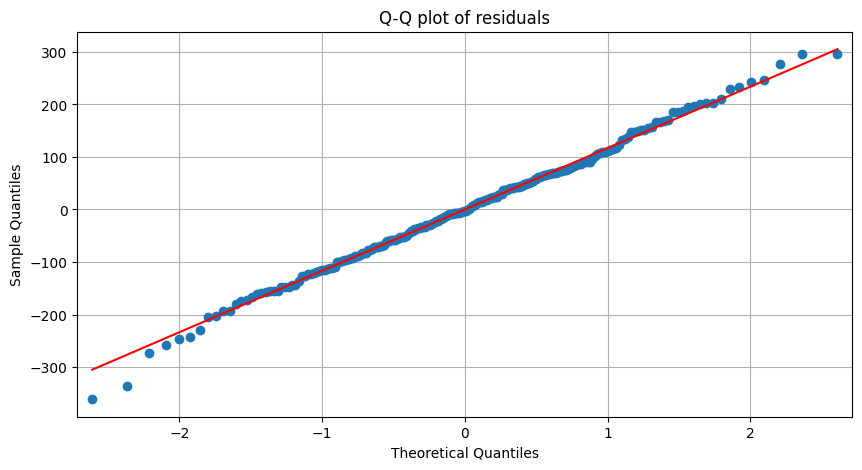

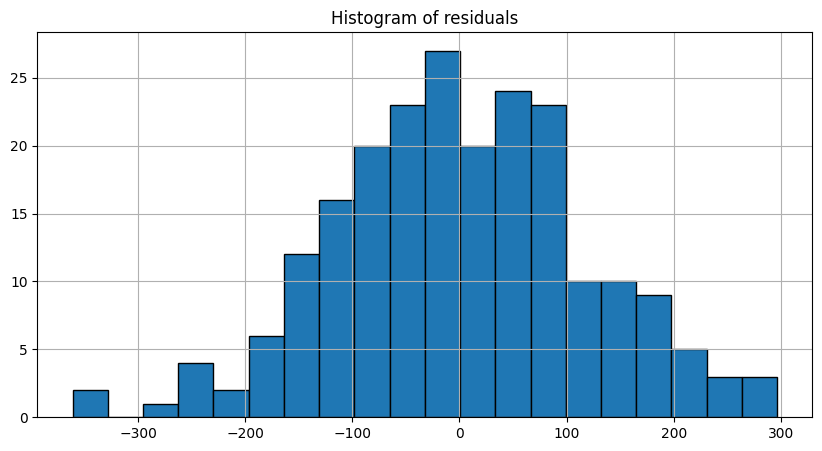

Shapiro-Wilk Test: W=0.9967, p-value=0.9299


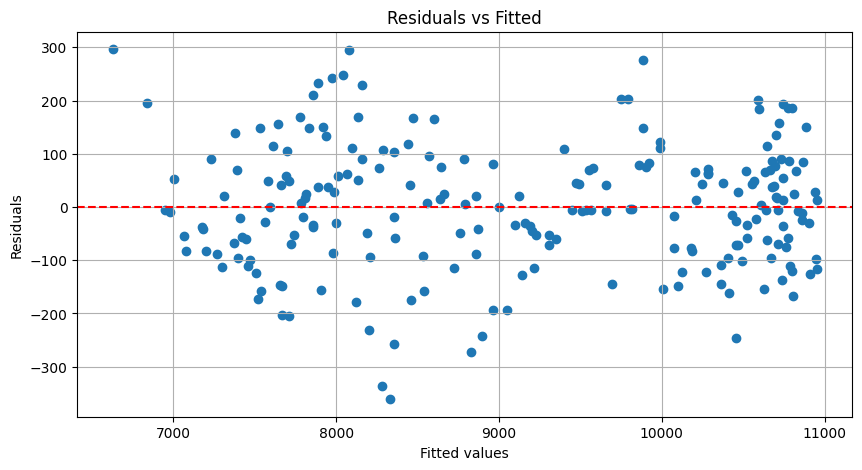

Breusch-Pagan Test: Lagrange multiplier statistic=31.2329, p-value=0.0126
Durbin-Watson Test statistic: 1.1735
VIF for variable 0: 48.0202
VIF for variable 1: 1301.4335
VIF for variable 2: 52599.1876
VIF for variable 3: 302862.5855
VIF for variable 4: 323720.0305
VIF for variable 5: 45330.9082
VIF for variable 6: 1.8275
VIF for variable 7: 1.8283
VIF for variable 8: 1.8295
VIF for variable 9: 1.7913
VIF for variable 10: 1.7914
VIF for variable 11: 1.7916
VIF for variable 12: 1.7919
VIF for variable 13: 1.7923
VIF for variable 14: 1.7928
VIF for variable 15: 1.7935
VIF for variable 16: 1.7943


In [128]:
validate_model_assumptions(model_final_fit)

### 1. Breusch-Pagan Test:
- Resultado: Lagrange multiplier statistic=31.2329, p-value=0.0126
- Interpretación: Un p-valor de 0.0126 indica que hay evidencia suficiente para rechazar la hipótesis nula de homocedasticidad, lo que sugiere que los residuos no tienen una varianza constante (hay heterocedasticidad).

### 2. Durbin-Watson Test:
- Resultado: Durbin-Watson Test statistic: 1.1735
- Interpretación: Un valor de Durbin-Watson cercano a 2 indica poca autocorrelación en los residuos. Sin embargo, en este caso, el valor de 1.1735 sugiere que hay autocorrelación positiva en los residuos, lo que es un problema para la validez del modelo.

### 3. VIF (Variance Inflation Factor):
- Resultados: Los VIF extremadamente altos (algunos superiores a 100,000) sugieren una multicolinealidad severa entre los predictores, especialmente en los términos polinomiales de alto orden.
VIF para los términos de orden bajo como los meses están en rangos aceptables (alrededor de 1.8), pero los términos del polinomio muestran una multicolinealidad severa.

### Posible Solución:
- Reducir el Orden del Polinomio:
- Acción: Dado que los términos de alto orden en el polinomio están causando multicolinealidad, considera reducir el orden del polinomio. Puede que el orden 5 sea demasiado alto y esté introduciendo problemas de multicolinealidad. Intenta con un polinomio de orden más bajo, como 3 o 4.

MODELO DE ORDEN #3
                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1079.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          3.41e-179
Time:                        10:09:59   Log-Likelihood:                -1370.3
No. Observations:                 214   AIC:                             2771.
Df Residuals:                     199   BIC:                             2821.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6975.3189     53.370 

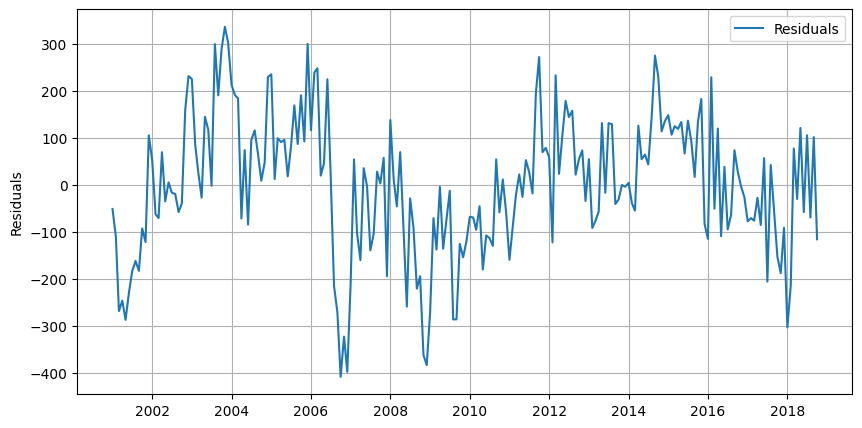

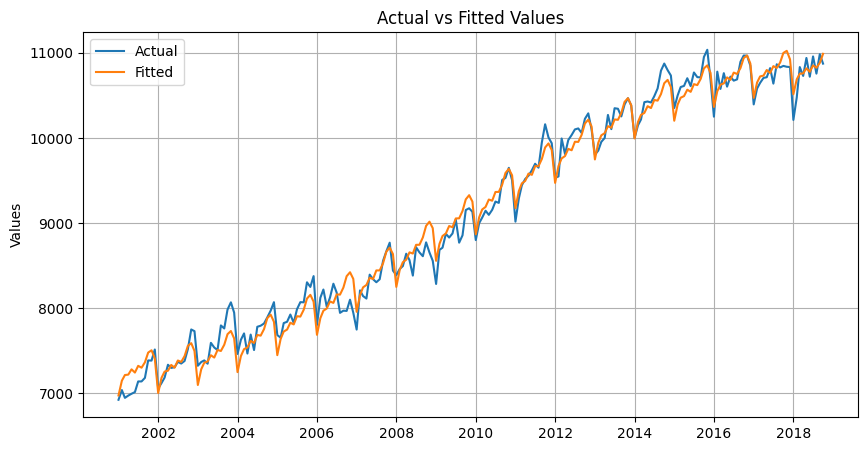

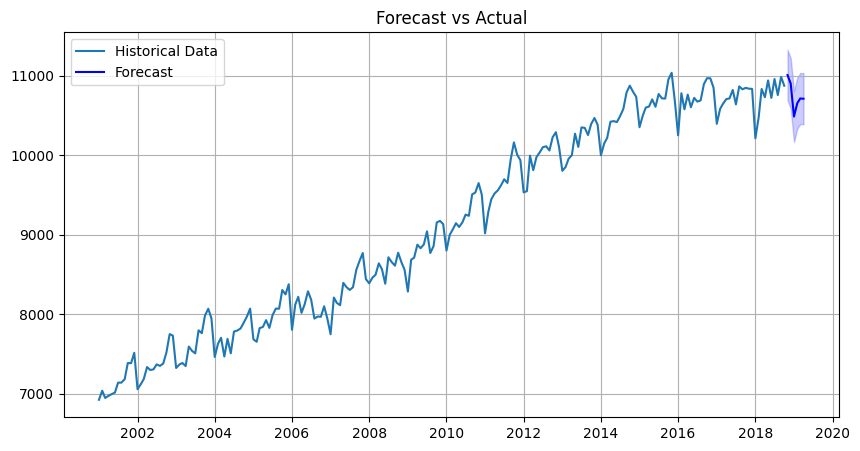

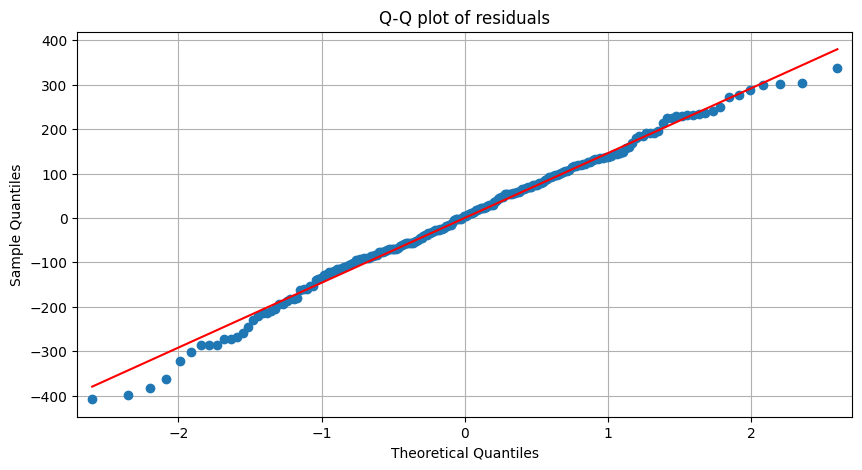

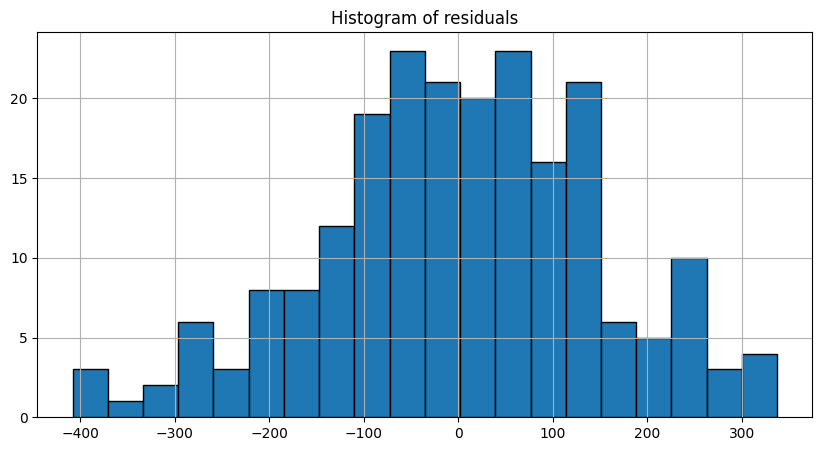

Shapiro-Wilk Test: W=0.9914, p-value=0.2401


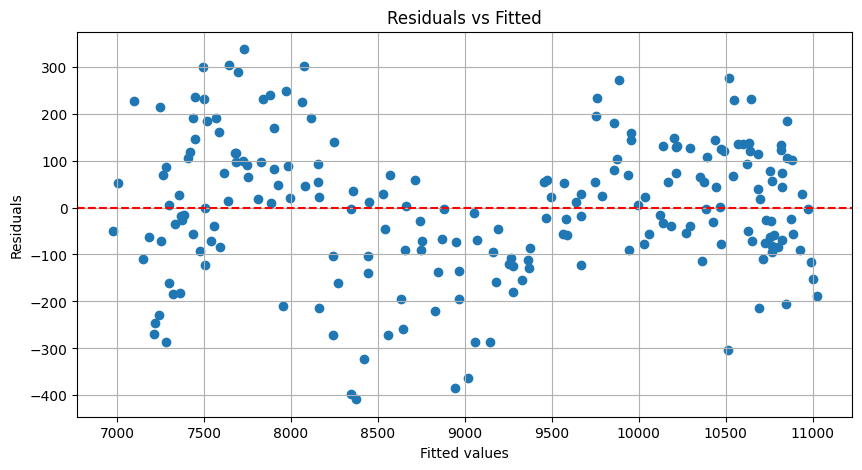

Breusch-Pagan Test: Lagrange multiplier statistic=31.6574, p-value=0.0045
Durbin-Watson Test statistic: 0.7508
VIF for variable 0: 26.5632
VIF for variable 1: 102.6356
VIF for variable 2: 589.2000
VIF for variable 3: 229.4115
VIF for variable 4: 1.8318
VIF for variable 5: 1.8321
VIF for variable 6: 1.8324
VIF for variable 7: 1.8329
VIF for variable 8: 1.8336
VIF for variable 9: 1.8344
VIF for variable 10: 1.8353
VIF for variable 11: 1.8364
VIF for variable 12: 1.8376
VIF for variable 13: 1.7923
VIF for variable 14: 1.7928


In [131]:
preds, rmse_train, rmse_test, model_order_3_fit = fit_polynomial_model_with_seasonality(
        order=3,
        train_data=train_data_ocupado,
        test_data=test_data_ocupado,
        h=6
    )

validate_model_assumptions(model_order_3_fit)